# import libraries`

In [1]:
import numpy as np
from sys import argv
import pandas as pd
import pickle
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import mlflow
from sklearn.datasets import make_moons, make_blobs
import mlflow.sklearn
%matplotlib inline

# Create dummy data with 3 attributes and 1000 records


In [2]:
data = make_blobs(n_samples=1000, n_features=3, cluster_std=[10,20,30],
                       shuffle=False, random_state=42,center_box=(100,1000),centers=3)[0].astype(int)
data.shape

(1000, 3)

# Train kmeans model for input number of records. Version 1

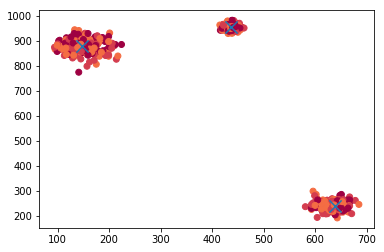

In [3]:

sample_train, sample_test = train_test_split(data, test_size=0.50)
model1 = KMeans(n_clusters=3, random_state=0)
train =  model1.fit(sample_train)
model1.predict(sample_test)
score=model1.score(sample_test)

centroids =  model1.cluster_centers_
labels = model1.labels_

# ## Figures
plt.scatter(sample_test[:,0],sample_test[:,1], c=[plt.cm.Spectral(float(i) /10) for i in labels]);

plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=150, linewidths = 5, zorder = 10)
# plt.show()
plt.show()
# mlflow
score = model1.score(np.array([2,3,4]).reshape(1,-1))



# Lets save the Model version 1

In [4]:
mlflow.log_param("Samples",1000)
mlflow.log_param("clusters",3)
mlflow.log_metric("score",score)
mlflow.sklearn.log_model(model1, "model")
run_id1 = mlflow.active_run().info.run_uuid
run_id1

'ebef947fd533422282f5acbc2647405b'

In [5]:
mlflow.end_run()

# Add more records

In [6]:

delta = make_blobs(n_samples=500, n_features=3, cluster_std=[10,20,30],
                       shuffle=False, random_state=42,center_box=(100,1000),centers=3)[0].astype(int)
new_data = np.vstack((data,delta))
new_data.shape

(1500, 3)

# Train kmeans model for input number of records. Version 2

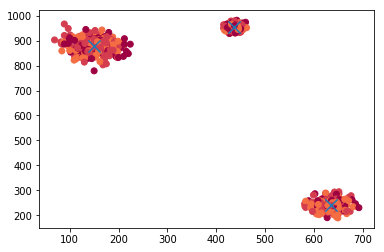

In [7]:

sample_train, sample_test = train_test_split(new_data, test_size=0.50)
model2 = KMeans(n_clusters=3, random_state=0)
train =  model2.fit(sample_train)
model2.predict(sample_test)
score=model2.score(sample_test)
centroids =  model2.cluster_centers_
labels = model2.labels_

# ## Figures
plt.scatter(sample_test[:,0],sample_test[:,1], c=[plt.cm.Spectral(float(i) /10) for i in labels]);

plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=150, linewidths = 5, zorder = 10)
# plt.show()
plt.show()
score = model2.score(np.array([2,3,4]).reshape(1,-1))

# Lets save the Model version 2

In [8]:
mlflow.log_param("Samples",1000)
mlflow.log_param("clusters",3)
mlflow.log_metric("score",score)
mlflow.sklearn.log_model(model2, "model")
run_id2 = mlflow.active_run().info.run_uuid
run_id2

'93c4b172ce2c42a29fafeb53b72fc5ba'

# Load model version 1 with the help of run id

In [9]:
loaded_model1 = mlflow.sklearn.load_model("model",run_id1)

# Gives same score as of model version 1

In [10]:
loaded_model1.score(np.array([2,3,4]).reshape(1,-1))

-515649.49818551337

# Load model version 2 with the help of run id


In [11]:
loaded_model2 = mlflow.sklearn.load_model("model",run_id2)

# Gives same score as of model version 2

In [12]:
loaded_model2.score(np.array([2,3,4]).reshape(1,-1))

-514178.15008720884